In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dmc_reblocked.csv')
data = df.to_numpy()
#df
#df.to_numpy()[:,0]#prints kinetic energy
E_exact = -2.903724377034119598311159245194404

In [3]:
df

,Unnamed: 0,tau,eavg,err
0,0,0.0015,-2.903736,0.000020
1,1,0.0025,-2.903699,0.000027
2,2,0.0050,-2.903853,0.000036
3,3,0.0100,-2.904342,0.000056


In [4]:
tau = data[:, 1]
E_av = data[:, 2]
E_errbar = data[:, 3]

In [5]:
def func(x, a, b):
    return a * x + b

from scipy.optimize import curve_fit
# Perform curve fitting with weighted least squares
popt, pcov = curve_fit(func, tau, E_av, sigma=E_errbar, absolute_sigma=True)
xextr = np.linspace(0,0.01,10)

Ground state energy at tau=0 is E_0 =  -2.9036 ± 2e-05


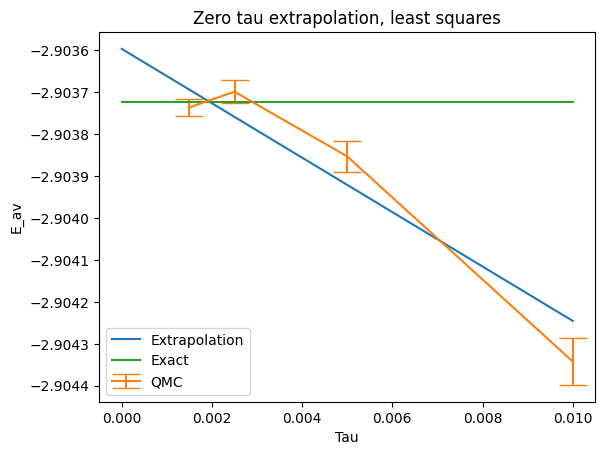

In [6]:
plt.xlabel('Tau')
plt.ylabel('E_av')
plt.title('Zero tau extrapolation, least squares')
plt.plot(xextr, func(xextr, popt[0], popt[1]), label = 'Extrapolation')
plt.errorbar(tau, E_av, yerr = E_errbar, capsize=10, label = 'QMC')
plt.plot([0,0.01], [E_exact, E_exact], label = 'Exact')
plt.legend()
E_0 = popt[1]
E_0_err = np.sqrt(pcov[1,1])
print('Ground state energy at tau=0 is E_0 = ',np.round(E_0,5), '±', np.round(E_0_err,5))

Ground state energy at tau=0 is E_0 =  -2.90355 ± 7e-05


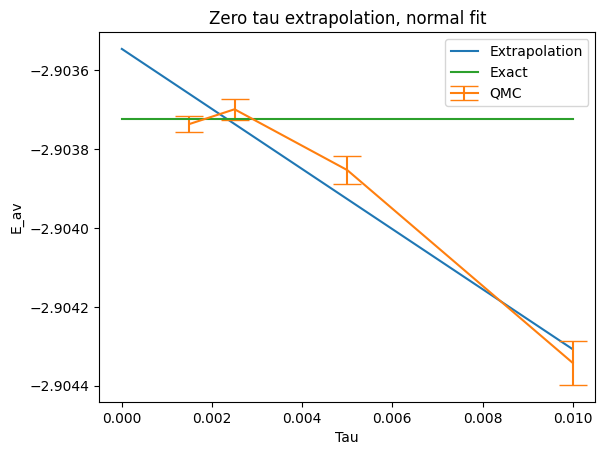

In [7]:
def func(x, a, b):
    return a * x + b

# Perform curve fitting 
popt, pcov = curve_fit(func, tau, E_av)
xextr = np.linspace(0,0.01,10)
plt.xlabel('Tau')
plt.ylabel('E_av')
plt.title('Zero tau extrapolation, normal fit')
plt.plot(xextr, func(xextr, popt[0], popt[1]), label = 'Extrapolation')
plt.errorbar(tau, E_av, yerr = E_errbar, capsize=10, label = 'QMC')
plt.plot([0,0.01], [E_exact, E_exact], label = 'Exact')
plt.legend()
E_0 = popt[1]
E_0_err = np.sqrt(pcov[1,1])
print('Ground state energy at tau=0 is E_0 = ',np.round(E_0,5), '±', np.round(E_0_err,5))

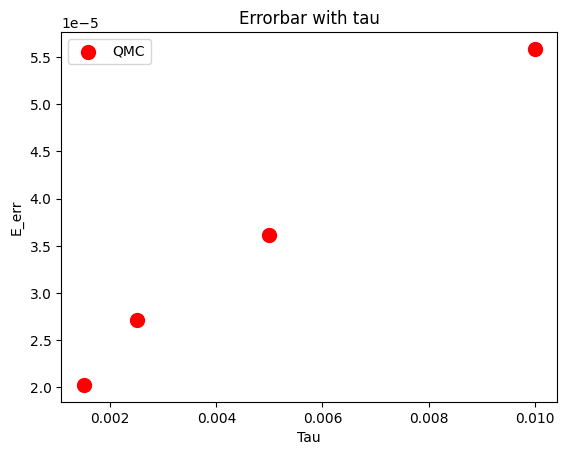

In [8]:
plt.xlabel('Tau')
plt.ylabel('E_err')
plt.title('Errorbar with tau')
plt.scatter(tau, E_errbar, label = 'QMC', c = 'red', s = 100)
plt.legend()

# New fit

In [9]:
def func2(x, b,c):
    return b +c*x**2

from scipy.optimize import curve_fit
# Perform curve fitting with weighted least squares
popt2, pcov2 = curve_fit(func2, tau, E_av, absolute_sigma=True, sigma=E_errbar)
xextr = np.linspace(0,0.01,100)

In [10]:
popt2

array([-2.90369954, -6.33081813])

In [11]:
pcov2

array([[ 2.67084402e-10, -4.64086194e-06],
       [-4.64086194e-06,  3.47267404e-01]])

Ground state energy at tau=0 is E_0 =  -2.90369954 ± 1.634e-05


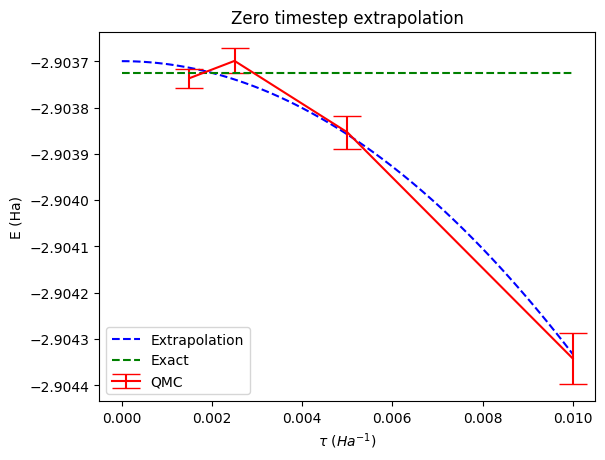

In [12]:
plt.xlabel(r'$\tau\ (Ha^{-1})$')
plt.ylabel('E (Ha)')
plt.title(r'Zero timestep extrapolation')
plt.plot(xextr, func2(xextr, popt2[0], popt2[1]), label = 'Extrapolation',c='b',ls='--')
plt.errorbar(tau, E_av, yerr = E_errbar, capsize=10, label = 'QMC',c='r')
plt.plot([0,0.01], [E_exact, E_exact], label = 'Exact',c='g',ls='--')
plt.legend()
E_0 = popt2[0]
E_0_err = np.sqrt(pcov2[0,0])
print('Ground state energy at tau=0 is E_0 = ',np.round(E_0,8), '±', np.round(E_0_err,8))
E_exact = -2.903724377034119598311159245194404

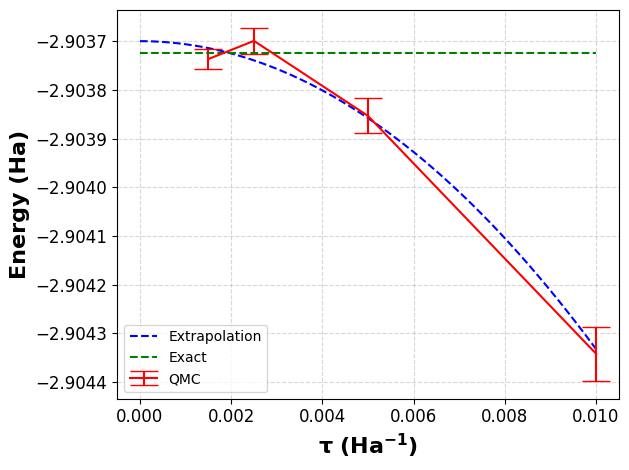

In [13]:
plt.plot(xextr, func2(xextr, popt2[0], popt2[1]), label = 'Extrapolation',c='b',ls='--')
plt.errorbar(tau, E_av, yerr = E_errbar, capsize=10, label = 'QMC',c='r')
plt.plot([0,0.01], [E_exact, E_exact], label = 'Exact',c='g',ls='--')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)  # Adjust fontsize for x-axis
plt.yticks(fontsize=12)  # Adjust fontsize for y-axis
plt.ylabel('Energy (Ha)', fontsize=16, fontweight='bold')
plt.xlabel(r'$\mathbf{\tau\ (Ha^{-1})}$', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()